In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [26]:
df = pd.read_csv("balanced_migraine_data.csv")

In [27]:
df=df.drop_duplicates()

In [28]:
df.shape

(953, 24)

In [29]:
features = df.select_dtypes(include=['number']).columns
type = df["Type"]
df = df[features]
print(df.head())

   Age  Duration  Frequency  Location  Character  Intensity  Nausea  Vomit  \
0   30         1          5         1          1          2       1      0   
1   50         3          5         1          1          3       1      1   
2   53         2          1         1          1          2       1      1   
3   45         3          5         1          1          3       1      0   
4   53         1          1         1          1          2       1      0   

   Phonophobia  Photophobia  ...  Dysarthria  Vertigo  Tinnitus  Hypoacusis  \
0            1            1  ...           0        0         0           0   
1            1            1  ...           0        1         0           0   
2            1            1  ...           0        0         0           0   
3            1            1  ...           0        1         0           0   
4            1            1  ...           0        0         0           0   

   Diplopia  Defect  Ataxia  Conscience  Paresthesia  DP

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

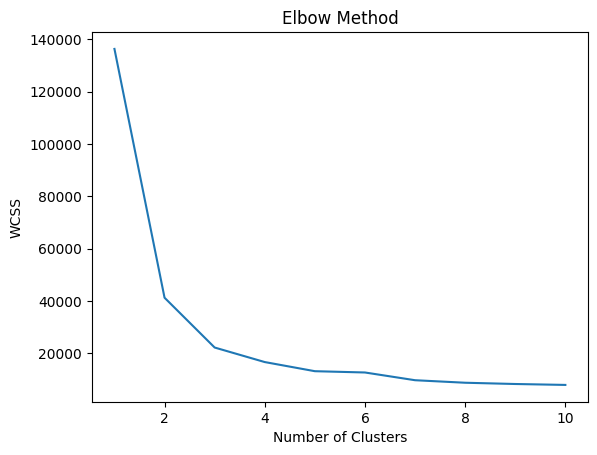

In [31]:
wcss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [32]:
optimal_clusters = 3

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [33]:
df['Clusters'] = clusters
print(df.head())

   Age  Duration  Frequency  Location  Character  Intensity  Nausea  Vomit  \
0   30         1          5         1          1          2       1      0   
1   50         3          5         1          1          3       1      1   
2   53         2          1         1          1          2       1      1   
3   45         3          5         1          1          3       1      0   
4   53         1          1         1          1          2       1      0   

   Phonophobia  Photophobia  ...  Vertigo  Tinnitus  Hypoacusis  Diplopia  \
0            1            1  ...        0         0           0         0   
1            1            1  ...        1         0           0         0   
2            1            1  ...        0         0           0         0   
3            1            1  ...        1         0           0         0   
4            1            1  ...        0         0           0         0   

   Defect  Ataxia  Conscience  Paresthesia  DPF  Clusters  
0       

In [37]:
cluster_analysis = df.groupby('Clusters')["Age"].mean()
print(cluster_analysis)

Clusters
0    26.194915
1    30.151261
2    38.330579
Name: Age, dtype: float64


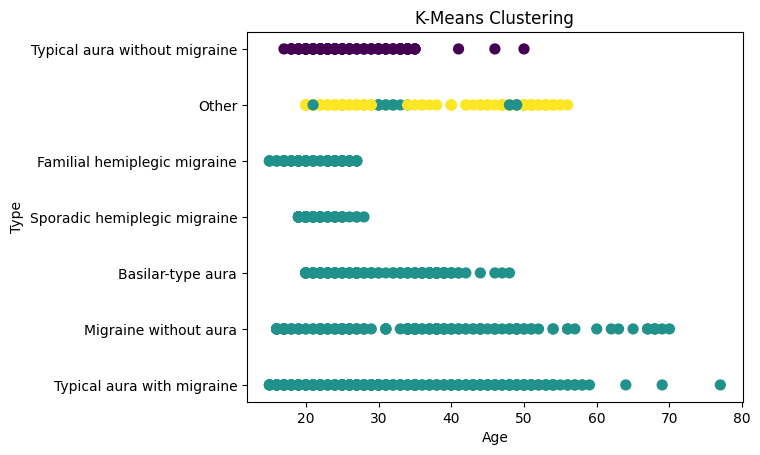

In [38]:
plt.scatter(df['Age'], type, c=clusters, cmap='viridis', s=50)
plt.xlabel('Age')
plt.ylabel('Type')
plt.title('K-Means Clustering')
plt.show()